In [1]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import pymongo
from pprint import pprint 

In [2]:
# plot settings
import matplotlib.pyplot as plt

FIGSIZE_TWOCOL = (10,5)
FIGSIZE_ONECOL = (5,5)

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size= MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize= MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize= MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
df=pd.read_csv('hubs.csv')

In [4]:
df.head()

   Unnamed: 0  degree        id         C        cc  in_degree  out_degree
0          73   19065    807095  0.002633  0.417001      19064           9
1         204   14637   1652541  0.003601  0.510699      14629          47
2         277   13144   2467791  0.004233  0.440488      13129          56
3           1   12217  87818409  0.004283  0.434341      12200          54
4         141   10752    816653  0.002871  0.459824      10744          29

In [5]:
CLIENT = MongoClient()
DB = CLIENT['social_database_test']
db = CLIENT.social_database_test

In [6]:
tweets = db.merged_03_17_25

In [249]:
names=[]
screen_names = []
followers = []
friends = []
for i in range(df.shape[0]):
    for userid in tweets.find( {"id":int (df['id'][i])}):
        names.append( userid['name'] )
        screen_names.append( '@'+userid['screen_name'] )
        followers.append(userid['followers_count'])
        friends.append(userid['friends_count'])

print names[:10]
print screen_names[:10]

[u'The New York Times', u'Reuters Top News', u'Washington Post', u'The Guardian', u'TechCrunch', u'TIME', u'HuffPost', u'Forbes', u'The Onion', u'BBC News (UK)']
[u'@nytimes', u'@Reuters', u'@washingtonpost', u'@guardian', u'@TechCrunch', u'@TIME', u'@HuffPost', u'@Forbes', u'@TheOnion', u'@BBCNews']


In [250]:
tweets.find_one()

{u'_id': ObjectId('5b17c2a5e4721c6552885fd1'),
 u'created_at': u'Mon Mar 12 23:09:05 +0000 2007',
 u'day': 19,
 u'favorite_count': 24,
 u'favourites_count': 7502,
 u'followers_count': 31333,
 u'friends_count': 9491,
 u'hashtags': [u'deletefacebook'],
 u'hour': 22,
 u'id': 1051731,
 u'lang': u'en',
 u'name': u'David Berkowitz',
 u'retweets': 0,
 u'screen_name': u'dberkowitz',
 u'statuses_count': 18904,
 u'tweet_created_at': u'Mon Mar 19 22:34:59 +0000 2018',
 u'tweets': 4}

In [251]:
df['name'] = names
df['screen_name'] = screen_names
df['followers'] = followers
df['friends'] = friends

In [252]:
df = df.sort_values('in_degree', ascending=False)

In [363]:
df['Interest'] = df['in_degree']/df['followers']
df['LogInterest'] = np.log10(df['in_degree'])/np.log10(df['followers'])

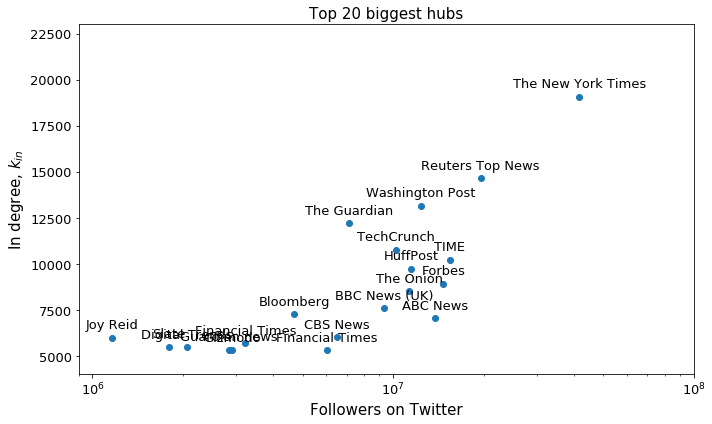

In [378]:
fig,ax = plt.subplots(figsize = (10,6))
n = 20
plt.plot(df['followers'][:n], df['degree'][:n], 'o')
for i in range(n):
    plt.text(df['followers'][i],df['degree'][i]+500, str(df['name'][i]),ha ='center', fontsize =13)

plt.xlabel('Followers on Twitter')
plt.ylabel('In degree, $k_{in}$')
plt.title('Top {} biggest hubs'.format(n))
plt.xlim(10**6-100000, 10**8)    
plt.ylim(4*10**3, 2*10**4+3000)
ax.set_xscale('log')
#plt.loglog()
plt.tight_layout()
plt.savefig('./imgs/hubs_followers.pdf', format='pdf')

In [379]:
df_interest = df.sort_values('in_degree',ascending=False).iloc[:n]
df_interest = df_interest.sort_values('Interest')

In [380]:
lab_screen =df_interest['screen_name'][:n]
lab =df_interest['name'][:n]
lab = lab+" "+lab_screen
nums = range(n,0,-1)
lab = [ l+", "+str(nums[i])   for i,l in enumerate(lab) ]

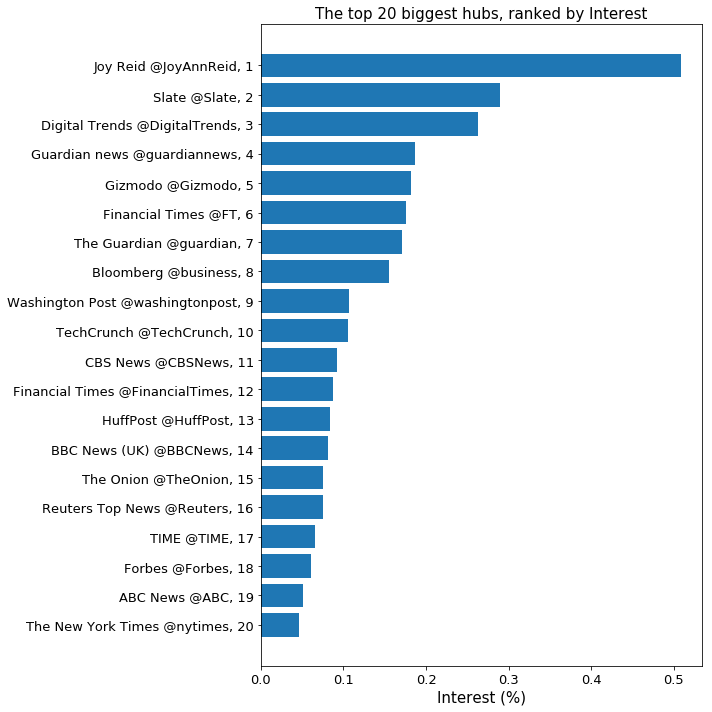

In [381]:
plt.subplots(figsize=(10,10))
X=df_interest['Interest'][:n]*100
#X=df_interest['Interest'][:n]
plt.barh(range(n), X)
#plt.barh(range(n),df_interest['followers'])
##plt.barh(range(n),df_interest['C'])
plt.yticks( range(n),lab)
plt.title('The top {} biggest hubs, ranked by Interest'.format(n))
plt.xlabel('Interest (%)')
plt.tight_layout()
plt.savefig('./imgs/hubs_interest.pdf', format='pdf')

In [310]:
df_interest.tail()

    Unnamed: 0  degree        id         C        cc  in_degree  out_degree  \
16           9    5461    788524  0.009302  0.429528       5438          54   
15         214    5491  14763734  0.004315  0.398339       5215        4102   
27           4    4512   2884771  0.010711  0.407444       4507          17   
13          75    5991  49698134  0.014402  0.422554       5921         174   
26          76    4667  16012783  0.013409  0.387894       4646          47   

               name     screen_name  followers  friends  Interest  
16   Digital Trends  @DigitalTrends    2063955  1239048  0.002635  
15            Slate          @Slate    1798290      622  0.002900  
27  The Daily Beast  @thedailybeast    1166723      939  0.003863  
13         Joy Reid     @JoyAnnReid    1163897     4930  0.005087  
26    Scott Dworkin         @funder     319901    46448  0.014523  

[]

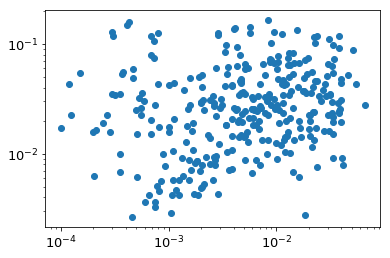

In [311]:
plt.plot(df['Interest'],df['C'], 'o')
plt.loglog()

In [93]:
df.iloc[:10]

   Unnamed: 0  degree        id         C        cc                name  \
0          73   19065    807095  0.002633  0.417001  The New York Times   
1         204   14637   1652541  0.003601  0.510699    Reuters Top News   
2         277   13144   2467791  0.004233  0.440488     Washington Post   
3           1   12217  87818409  0.004283  0.434341        The Guardian   
4         141   10752    816653  0.002871  0.459824          TechCrunch   
5          22   10223  14293310  0.004226  0.384827                TIME   
6         247    9736  14511951  0.005690  0.432582            HuffPost   
7         301    8915  91478624  0.003641  0.407271              Forbes   
8         146    8514  14075928  0.003293  0.442905           The Onion   
9         224    7594    612473  0.004596  0.471411       BBC News (UK)   

   followers  friends  Interest  
0   41595294      879  0.000458  
1   19554136     1068  0.000749  
2   12338937     1473  0.001065  
3    7116469     1106  0.001717  
4   

In [100]:
df_interest.tail()

    Unnamed: 0  degree        id         C        cc             name  \
12         188    6005  15012486  0.007782  0.409685         CBS News   
4          141   10752    816653  0.002871  0.459824       TechCrunch   
2          277   13144   2467791  0.004233  0.440488  Washington Post   
10         283    7262  34713362  0.005709  0.408234        Bloomberg   
3            1   12217  87818409  0.004283  0.434341     The Guardian   

    followers  friends  Interest  
12    6486398      431  0.000926  
4    10211927     1012  0.001053  
2    12338937     1473  0.001065  
10    4687113     1103  0.001549  
3     7116469     1106  0.001717  

In [17]:
tweets.find_one()

{u'_id': ObjectId('5b17c2a5e4721c6552885fd1'),
 u'created_at': u'Mon Mar 12 23:09:05 +0000 2007',
 u'day': 19,
 u'favorite_count': 24,
 u'favourites_count': 7502,
 u'followers_count': 31333,
 u'friends_count': 9491,
 u'hashtags': [u'deletefacebook'],
 u'hour': 22,
 u'id': 1051731,
 u'lang': u'en',
 u'name': u'David Berkowitz',
 u'retweets': 0,
 u'screen_name': u'dberkowitz',
 u'statuses_count': 18904,
 u'tweet_created_at': u'Mon Mar 19 22:34:59 +0000 2018',
 u'tweets': 4}

# prova estrazione italiani

In [12]:
import collections
import networkx as nx
import numpy as np
import os
import random
from sklearn import linear_model
import json as json


In [ ]:
g = nx.read_edgelist('../network/networks/edge_list.txt',
                     create_using=nx.DiGraph(), nodetype=int, data=False)

In [16]:
temp = g.nodes()
nodes = [nd for nd in temp]


In [39]:
names=[]
screen_names = []
followers = []
friends = []
users = []

for userid in tweets.find( {"lang": "it"}).sort('followers_count', pymongo.DESCENDING):
    users.append(userid)
    names.append( userid['name'] )
    screen_names.append( '@'+userid['screen_name'] )
    followers.append(userid['followers_count'])
    friends.append(userid['friends_count'])


In [51]:
user_ids_db = [u['id'] for u in users]

In [53]:
italian_users = set(nodes) & set(user_ids_db)

In [54]:
len(italian_users)

2392

In [55]:
len(names)

2464